# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import datetime
from dateutil.relativedelta import relativedelta
%matplotlib inline



In [2]:
# Load .env enviroment variables
load_dotenv()


True

In [3]:
## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc=1.2
my_eth=5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC price
btc_request=requests.get(btc_url).json()
btc_price=btc_request["data"]['1']["quotes"]["CAD"]["price"]

# Fetch current ETH price
eth_request=requests.get(eth_url).json()
eth_price=eth_request["data"]["1027"]["quotes"]["CAD"]["price"]
# # Compute current value of my crpto
my_btc_value=btc_price *my_btc
my_eth_value=eth_price*my_eth

# # Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $75564.78
The current value of your 5.3 ETH is $27483.23


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_key= os.getenv("ALPACA_API_KEY")
alpaca_secret_key= os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca_api=tradeapi.REST(
    alpaca_key,
    alpaca_secret_key,
    api_version="v2")



In [9]:
# Format current date as ISO format
current_date=datetime.date.today()
four_yrs_ago = datetime.date.today() - relativedelta(years=4)

start = pd.Timestamp(four_yrs_ago,tz="America/New_York").isoformat()
today= pd.Timestamp(current_date, tz="America/New_York").isoformat()
# Set the tickers

tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

investments = alpaca_api.get_barset(tickers,timeframe,start=start, end = today,limit=1000).df

# Preview DataFrame
investments.tail(10).sort_index(ascending=False)

AGG                                         \
                             open      high       low    close    volume   
time                                                                       
2021-12-10 00:00:00-05:00  114.37  114.5100  114.2200  114.240   6263328   
2021-12-09 00:00:00-05:00  114.28  114.3860  114.1200  114.200   8223995   
2021-12-08 00:00:00-05:00  114.37  114.3700  114.0500  114.170   7416826   
2021-12-07 00:00:00-05:00  114.52  114.7100  114.4500  114.475   5783341   
2021-12-06 00:00:00-05:00  114.98  115.0391  114.6196  114.660   6364620   
2021-12-03 00:00:00-05:00  114.50  115.2400  114.4600  115.060   7279561   
2021-12-02 00:00:00-05:00  114.67  114.7900  114.4001  114.610   7507924   
2021-12-01 00:00:00-05:00  114.27  114.6400  114.2100  114.610  11306707   
2021-11-30 00:00:00-05:00  114.87  115.1074  114.5000  114.765  10624796   
2021-11-29 00:00:00-05:00  114.15  114.6000  114.1300  114.550   7604952   

                              SPY                                         
                             open      high       low   close     volume  
time                                                                      
2021-12-10 00:00:00-05:00  469.23  470.9000  466.5100  470.72   64958435  
2021-12-09 00:00:00-05:00  468.15  469.6291  466.1400  466.34   54963509  
2021-12-08 00:00:00-05:00  468.70  470.0000  466.8300  469.54   62917411  
2021-12-07 00:00:00-05:00  464.41  468.8800  458.6546  468.24   79124909  
2021-12-06 00:00:00-05:00  456.14  460.7900  453.5600  458.78   88930961  
2021-12-03 00:00:00-05:00  459.17  460.3000  448.9200  453.43  124795750  
2021-12-02 00:00:00-05:00  450.72  459.0700  450.3100  457.38  109873511  
2021-12-01 00:00:00-05:00  461.64  464.6700  450.2900  450.53  112177764  
2021-11-30 00:00:00-05:00  462.00  464.0300  455.3000  455.78  126435765  
2021-11-29 00:00:00-05:00  464.07  466.5600  461.7300  464.63   68239627

- Note: I passed the current_date and four_yrs_ago variables as arguments on my TimeStamp functions so that the API request built into the program always picks up the current date and the prices for the past 4 years before the current date.

In [10]:
# Pick AGG and SPY close prices
agg_close_price= investments["AGG"].iat[-1,3]

spy_close_price=investments["SPY"].iat[-1,3]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.24
Current SPY closing price: $470.72


In [11]:
# Compute the current value of shares
my_spy_value= my_spy *spy_close_price
my_agg_value=my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23536.00
The current value of your 200 AGG shares is $22848.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income= 12000.00

# Consolidate financial assets data

crypto=round(my_btc_value+my_eth_value,2)
shares=round(my_agg_value + my_spy_value,2)

# Create savings DataFrame
savings= {'crypto':crypto, "shares": shares}
df_savings= pd.DataFrame.from_dict(savings, orient= "index", columns=["amount"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,103048.01
shares,46384.00


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

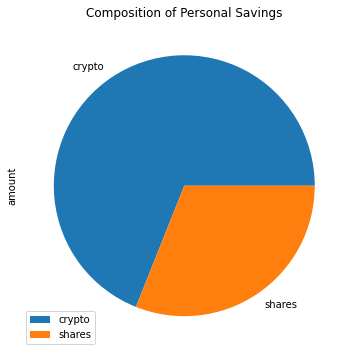

In [13]:
# Plot savings pie chart
df_savings.plot(kind="pie", figsize=(12,6), title='Composition of Personal Savings',y="amount")

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings=round(float(df_savings.sum()),2)

# Validate saving health
if total_savings>emergency_fund:
    print(f"Congratulations! Your savings of ${total_savings} is more than what you need for your emergency fund")
elif total_savings==emergency_fund:
    print(f"Congratulations! You've reached your goal of building your emergency fund.")
else:
    print(f"You're ${emergency_fund -total_savings} away from funding your emergency reserve fund")

Congratulations! Your savings of $149432.01 is more than what you need for your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
five_yrs_ago=datetime.date.today() - relativedelta(years=5)

start_date = pd.Timestamp(five_yrs_ago, tz='America/New_York').isoformat()

end_date = pd.Timestamp(current_date, tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca_api.get_barset(tickers,timeframe,start=start_date, end = end_date,limit=1000).df

# Display sample data
df_stock_data.dropna(inplace=True)

display(df_stock_data.tail(10).sort_index(ascending=False))

AGG                                           \
                             open      high       low    close      volume   
time                                                                         
2021-12-10 00:00:00-05:00  114.37  114.5100  114.2200  114.240   6263328.0   
2021-12-09 00:00:00-05:00  114.28  114.3860  114.1200  114.200   8223995.0   
2021-12-08 00:00:00-05:00  114.37  114.3700  114.0500  114.170   7416826.0   
2021-12-07 00:00:00-05:00  114.52  114.7100  114.4500  114.475   5783341.0   
2021-12-06 00:00:00-05:00  114.98  115.0391  114.6196  114.660   6364620.0   
2021-12-03 00:00:00-05:00  114.50  115.2400  114.4600  115.060   7279561.0   
2021-12-02 00:00:00-05:00  114.67  114.7900  114.4001  114.610   7507924.0   
2021-12-01 00:00:00-05:00  114.27  114.6400  114.2100  114.610  11306707.0   
2021-11-30 00:00:00-05:00  114.87  115.1074  114.5000  114.765  10559678.0   
2021-11-29 00:00:00-05:00  114.15  114.6000  114.1300  114.550   7604952.0   

                              SPY                                           
                             open      high       low   close       volume  
time                                                                        
2021-12-10 00:00:00-05:00  469.23  470.9000  466.5100  470.72   64958435.0  
2021-12-09 00:00:00-05:00  468.15  469.6291  466.1400  466.34   54963509.0  
2021-12-08 00:00:00-05:00  468.70  470.0000  466.8300  469.54   62917411.0  
2021-12-07 00:00:00-05:00  464.41  468.8800  458.6546  468.24   79124909.0  
2021-12-06 00:00:00-05:00  456.14  460.7900  453.5600  458.78   88930961.0  
2021-12-03 00:00:00-05:00  459.17  460.3000  448.9200  453.43  124795750.0  
2021-12-02 00:00:00-05:00  450.72  459.0700  450.3100  457.38  109873511.0  
2021-12-01 00:00:00-05:00  461.64  464.6700  450.2900  450.53  112177764.0  
2021-11-30 00:00:00-05:00  462.00  464.0300  455.3000  455.78  126381409.0  
2021-11-29 00:00:00-05:00  464.07  466.5600  461.7300  464.63   68239627.0

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims=500

thirty_years = 252 * 30

retirement_portfolio = MCSimulation(
    portfolio_data = df_stock_data,
    weights=[.60,.40],
    num_simulation = num_sims,
    num_trading_days = thirty_years)



In [18]:
# Printing the simulation input data - See to plot anything or not?
retirement_portfolio.portfolio_data.dropna().tail(10).sort_index(ascending=False)

AGG                                           \
                             open      high       low    close      volume   
time                                                                         
2021-12-10 00:00:00-05:00  114.37  114.5100  114.2200  114.240   6263328.0   
2021-12-09 00:00:00-05:00  114.28  114.3860  114.1200  114.200   8223995.0   
2021-12-08 00:00:00-05:00  114.37  114.3700  114.0500  114.170   7416826.0   
2021-12-07 00:00:00-05:00  114.52  114.7100  114.4500  114.475   5783341.0   
2021-12-06 00:00:00-05:00  114.98  115.0391  114.6196  114.660   6364620.0   
2021-12-03 00:00:00-05:00  114.50  115.2400  114.4600  115.060   7279561.0   
2021-12-02 00:00:00-05:00  114.67  114.7900  114.4001  114.610   7507924.0   
2021-12-01 00:00:00-05:00  114.27  114.6400  114.2100  114.610  11306707.0   
2021-11-30 00:00:00-05:00  114.87  115.1074  114.5000  114.765  10559678.0   
2021-11-29 00:00:00-05:00  114.15  114.6000  114.1300  114.550   7604952.0   

                                           SPY                              \
                          daily_return    open      high       low   close   
time                                                                         
2021-12-10 00:00:00-05:00     0.000350  469.23  470.9000  466.5100  470.72   
2021-12-09 00:00:00-05:00     0.000263  468.15  469.6291  466.1400  466.34   
2021-12-08 00:00:00-05:00    -0.002664  468.70  470.0000  466.8300  469.54   
2021-12-07 00:00:00-05:00    -0.001613  464.41  468.8800  458.6546  468.24   
2021-12-06 00:00:00-05:00    -0.003476  456.14  460.7900  453.5600  458.78   
2021-12-03 00:00:00-05:00     0.003926  459.17  460.3000  448.9200  453.43   
2021-12-02 00:00:00-05:00     0.000000  450.72  459.0700  450.3100  457.38   
2021-12-01 00:00:00-05:00    -0.001351  461.64  464.6700  450.2900  450.53   
2021-11-30 00:00:00-05:00     0.001877  462.00  464.0300  455.3000  455.78   
2021-11-29 00:00:00-05:00     0.000087  464.07  466.5600  461.7300  464.63   

                                                     
                                volume daily_return  
time                                                 
2021-12-10 00:00:00-05:00   64958435.0     0.009392  
2021-12-09 00:00:00-05:00   54963509.0    -0.006815  
2021-12-08 00:00:00-05:00   62917411.0     0.002776  
2021-12-07 00:00:00-05:00   79124909.0     0.020620  
2021-12-06 00:00:00-05:00   88930961.0     0.011799  
2021-12-03 00:00:00-05:00  124795750.0    -0.008636  
2021-12-02 00:00:00-05:00  109873511.0     0.015204  
2021-12-01 00:00:00-05:00  112177764.0    -0.011519  
2021-11-30 00:00:00-05:00  126381409.0    -0.019047  
2021-11-29 00:00:00-05:00   68239627.0     0.012200

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
retirement_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Juan traboulsi\desktop\fintech\UTOR-VIRT-FIN-PT-11-2021-U-C\05-APIs\Unit 5 Homework\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002588,0.998711,0.991864,0.991230,1.002718,0.997027,0.995449,1.002339,0.998298,0.995892,...,0.995873,0.998065,0.998614,1.001443,0.996412,1.003755,0.996049,0.999447,1.005982,1.004391
2,1.002194,1.001453,0.993155,0.991728,0.999321,0.993777,1.001651,0.996454,0.998150,0.996640,...,0.995194,1.003740,0.993336,1.004397,0.989849,1.006563,0.991657,0.996839,1.014256,1.006630
3,1.004165,0.995210,0.994622,0.992939,1.001709,0.993578,1.010471,1.003631,1.000215,0.992493,...,1.000654,1.008150,0.998429,1.014400,0.997612,1.011048,0.990188,0.997572,1.024951,1.011918
4,1.008370,1.001681,0.990470,0.983009,1.003092,0.993730,1.011070,1.002929,0.992477,0.990040,...,1.001954,1.017200,1.003711,1.015533,1.002977,1.015164,0.991666,0.991706,1.034470,1.012472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.911813,5.856901,9.024275,6.540815,11.163260,4.452477,6.198677,4.874328,6.246606,3.804494,...,17.384951,9.910398,10.080920,4.676936,8.994220,3.828308,9.004755,4.460281,11.775397,7.154331
7557,1.922357,5.858893,9.021237,6.528564,11.129942,4.472004,6.151397,4.847529,6.245485,3.826059,...,17.593353,9.923192,10.145497,4.695592,8.938559,3.832638,9.067943,4.470398,11.669604,7.193725
7558,1.934968,5.853245,8.985818,6.555553,11.076281,4.421450,6.143411,4.832542,6.181067,3.840659,...,17.461142,9.927324,10.194669,4.674144,8.938025,3.843093,9.145451,4.468849,11.597225,7.164245
7559,1.938429,5.826970,8.968010,6.605989,11.071225,4.443044,6.199635,4.835020,6.133658,3.833853,...,17.450523,9.843888,10.377293,4.689237,8.911922,3.845126,9.186527,4.471488,11.554310,7.149998


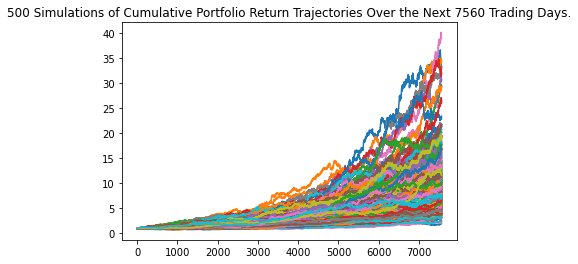

In [20]:
# Plot simulation outcomes
retirement_portfolio_sims_outcomes= retirement_portfolio.plot_simulation()

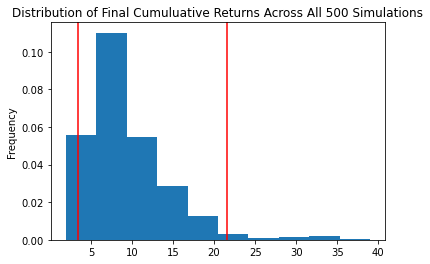

In [21]:
# Plot probability distribution and confidence intervals
retirement_sims_outcome_dist= retirement_portfolio.plot_distribution()


- Note: The graph above tells us the frequency of final cumulative returns that our first simulation produced. We can use it to infer the probability of any expected (cumulative) return. 

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
retirement_sims_statistics=retirement_portfolio.summarize_cumulative_return()

# Print summary statistics
print(retirement_sims_statistics)

count           500.000000
mean              9.429929
std               5.131026
min               1.945845
25%               5.942598
50%               8.216670
75%              11.515233
max              38.999694
95% CI Lower      3.431712
95% CI Upper     21.540783
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
retirement_portfolio_lower = round(retirement_sims_statistics[8]*initial_investment,2)
retirement_portfolio_upper = round(retirement_sims_statistics[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${retirement_portfolio_lower} and ${retirement_portfolio_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $68634.24 and $430815.65


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment_2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
retirement_portfolio_lower_2 = round(retirement_sims_statistics[8]*initial_investment_2,2)
retirement_portfolio_upper_2 = round(retirement_sims_statistics[9]*initial_investment_2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_2} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${retirement_portfolio_lower_2} and ${retirement_portfolio_upper_2}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within the range of $102951.35 and $646223.48


- Note: Our second scenario results in a range of higher values for our 95% confidence interval as a direct result of increasing our initial investment amount.

### Ten Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims_10Y=500
ten_years=10*252

retirement_portfolio_aggressive = MCSimulation(
    portfolio_data = df_stock_data,
    weights=[.80,.20],
    num_simulation = num_sims_10Y,
    num_trading_days = ten_years)

- Note: I have increased the portfolio's exposure to equities to 80% compared to 60% in our previous moderate portfolio. This higher exposure should result in a wider range of possible outcomes compared to the initial relatively moderate portfolio.

In [26]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
retirement_portfolio_aggressive.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Juan traboulsi\desktop\fintech\UTOR-VIRT-FIN-PT-11-2021-U-C\05-APIs\Unit 5 Homework\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004528,1.001890,0.997837,0.996557,1.002477,1.000573,0.999213,1.001013,0.995907,1.005132,...,0.999212,1.000122,0.998157,1.002212,1.000577,1.002295,1.001648,1.010620,0.999233,0.998480
2,1.007023,1.003271,0.996831,0.996639,1.005842,1.003463,0.994152,1.002743,1.002013,1.005131,...,1.000411,1.002043,1.001367,1.006232,1.010218,1.006099,1.006392,1.009115,0.995723,0.993225
3,1.007463,1.008573,1.004844,1.003427,1.006779,1.006978,0.990710,1.006326,1.007579,1.008968,...,1.004467,1.003894,0.996740,1.001606,1.010573,1.009502,1.003817,1.012944,0.998113,0.997061
4,1.005914,1.007330,1.008942,1.004439,1.008351,1.007742,0.994530,1.007695,1.013656,1.012459,...,1.001837,1.008049,0.999319,1.010063,1.008328,1.009711,0.999590,1.009898,0.995553,0.998000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.775050,2.095242,1.220700,1.650650,1.302822,1.305255,2.020638,1.375765,1.484399,1.833485,...,1.223646,1.484101,1.954582,1.301020,1.313966,1.369104,1.592006,1.198038,1.643668,1.051679
2517,1.775034,2.095909,1.217976,1.651099,1.307769,1.312832,2.022459,1.377362,1.484280,1.822607,...,1.223975,1.479517,1.944980,1.304343,1.308629,1.366231,1.594360,1.204868,1.629448,1.056226
2518,1.772234,2.091678,1.215399,1.653042,1.306576,1.321340,2.022155,1.365355,1.475557,1.814926,...,1.225448,1.475001,1.938861,1.294878,1.309646,1.374108,1.592853,1.208537,1.627974,1.063026
2519,1.764824,2.088893,1.210203,1.662401,1.303577,1.318788,2.020515,1.371257,1.478084,1.808999,...,1.216456,1.482469,1.944147,1.296659,1.304882,1.377951,1.589303,1.209355,1.630976,1.065373


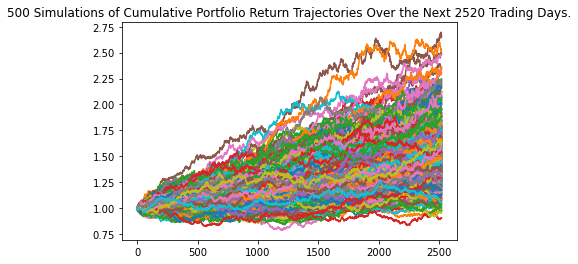

In [27]:
# Plot simulation outcomes
aggr_retirement_portfolio_sims_outcomes= retirement_portfolio_aggressive.plot_simulation()

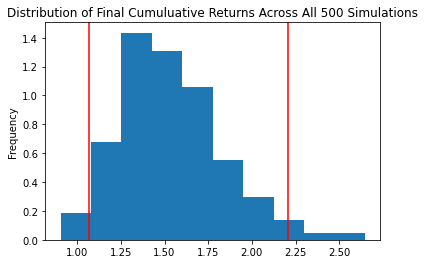

In [28]:
# Plot probability distribution and confidence intervals
aggr_retirement_portfolio_sims_dist= retirement_portfolio_aggressive.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
aggr_retirement_portfolio_sims_statistics=retirement_portfolio_aggressive.summarize_cumulative_return()

# Print summary statistics
print(aggr_retirement_portfolio_sims_statistics)

count           500.000000
mean              1.534712
std               0.291432
min               0.904742
25%               1.331660
50%               1.494754
75%               1.717688
max               2.647082
95% CI Lower      1.070533
95% CI Upper      2.208343
Name: 2520, dtype: float64


In [30]:
# Set initial investment
initial_investment_3 = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
aggr_retirement_portfolio_lower = round(aggr_retirement_portfolio_sims_statistics[8]*initial_investment_2,2)

aggr_retirement_portfolio_upper = round(aggr_retirement_portfolio_sims_statistics[9]*initial_investment_2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_3} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${aggr_retirement_portfolio_lower} and ${aggr_retirement_portfolio_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $32116.0 and $66250.3


- Note: By comparing both the 10Y and 30Y returns distribution plots we can note that the 10Y aggressive portfolio returns more volatile. Hence it shows has a wider range of possible outcomes. Both positives and negatives. In contrast, the 30Y moderate portfolio expected returns are more concentrated (less volatile). The expected return is never below zero however there is a relatively low chance of experiecing a high return compare to the 10Y portfolio.